<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 81  418k   81  342k    0     0   342k      0  0:00:01  0:00:01 --:--:--  189k
100  418k  100  418k    0     0   418k      0  0:00:01  0:00:01 --:--:--  230k


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [12]:
# Con los datos recolectados obtengo el dataframe:
df = pd.read_csv('weight_height.csv')
des = df.describe()
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [14]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
des.loc['NaN'] = df.isna().sum()
des.loc['%NaN'] = (df.isna().mean()) * 100
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
NaN,0.000000,0.000000
%NaN,0.000000,0.000000


*Observamos que no hay datos corruptos o elementos faltantes.*

In [15]:
print('Hay para Analizar {} datos.'.format(df.shape[0]))

Hay para Analizar 10000 datos.


In [16]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes

In [32]:
# Realizo una copia del dataframe para luego realizar la "limpieza".
df_clean = df.copy()

# Saco aquellas filas que tengan columnas vacías usando el método: "dropna":
df_clean.dropna(subset=['Gender'], inplace=True)
df_clean.dropna(subset=['Height'], inplace=True)
df_clean.dropna(subset=['Weight'], inplace=True)

In [33]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_clean.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [42]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en 
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
df2 = df_clean.copy()
df2['Gender'] = df_clean['Gender'].apply(lambda x: 'Masculino' if x == 'Male' else 'Femenino')
df2['Height'] = (df_clean['Height']  * 25.4) / 1000
df2['Weight'] = (df_clean['Weight']  * 453.592) / 1000

In [46]:
df2.head()

,Gender,Height,Weight
0,Masculino,1.875714,109.720985
1,Masculino,1.747060,73.622732
2,Masculino,1.882397,96.497550
3,Masculino,1.821967,99.809504
4,Masculino,1.774998,93.598619


In [48]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
print('Una Vez Procesado y Limpiado, los Datos a Analizar son {}.'.format(df2.shape[0]))

Una Vez Procesado y Limpiado, los Datos a Analizar son 10000.


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [ ]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos

<AxesSubplot:xlabel='Peso [kg]', ylabel='Altura [mt]'>

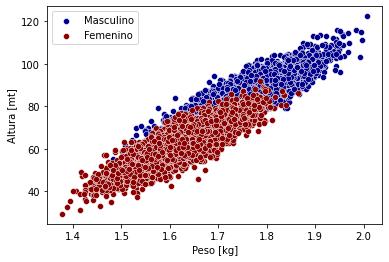

In [94]:
x_masc = df2[df2['Gender']=='Masculino']['Height'].values
y_masc = df2[df2['Gender']=='Masculino']['Weight'].values

x_femen = df2[df2['Gender']=='Femenino']['Height'].values
y_femen = df2[df2['Gender']=='Femenino']['Weight'].values

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('Peso [kg]')
ax.set_ylabel('Altura [mt]')
sns.scatterplot(x=x_masc, y=y_masc, label='Masculino', color='darkblue')
sns.scatterplot(x=x_femen, y=y_femen, label='Femenino', color='darkred')

El valor medio o la "media" es de: 1.7532691860179221


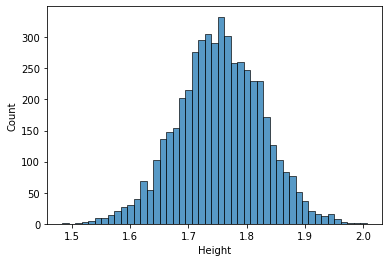

In [97]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio

sns.histplot(df2[df2['Gender'] == 'Masculino']['Height'])

media = df2[df2['Gender'] == 'Masculino']['Height'].mean()
print('El valor medio o la "media" es de: {}'.format(media))

El valor medio o la "media" es de: 1.6182028495269967


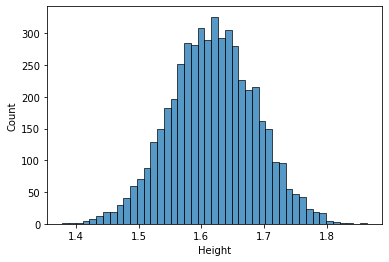

In [99]:
# Alumno: Dibujar la distribucion (histograma) de la altura en mujeres
# Además, imprimir en pantalla el valor medio

sns.histplot(df2[df2['Gender'] == 'Femenino']['Height'])

media = df2[df2['Gender'] == 'Femenino']['Height'].mean()
print('El valor medio o la "media" es de: {}'.format(media))

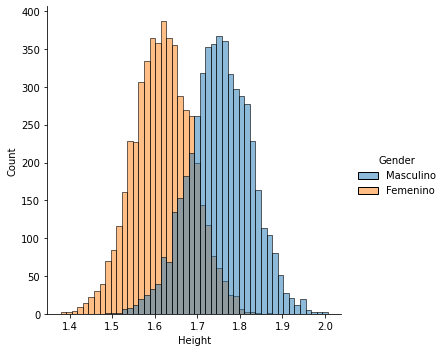

In [98]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"
sns.displot(data=df2, x="Height", hue="Gender")

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


- ## Masculino

In [142]:
# Obtengo las variables X e y (para masculino)
X_m = df2[df2['Gender'] == 'Masculino'][['Weight']].values
X_m

array([[109.72098511],
       [ 73.62273185],
       [ 96.49755015],
       ...,
       [ 90.35343991],
       [ 84.3254333 ],
       [ 90.22081499]])

In [143]:
y_m = df2[df2['Gender'] == 'Masculino']['Height'].values
y_m

array([1.87571423, 1.74706036, 1.88239668, ..., 1.70215039, 1.81756605,
       1.78693775])

In [144]:
#Divido el dataset en train y test 70%30%
from sklearn.model_selection import train_test_split

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.3, random_state=42)

In [145]:
# Entreno el Modelo utilizando Regresión Lineal de sklearn.
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train_m, y_train_m)
y_hat_m = lr.predict(X_test_m)

y_hat_m

array([1.83107698, 1.72784776, 1.72521746, ..., 1.84538681, 1.82376298,
       1.75660683])

- ## Femenino

In [148]:
# Obtengo las variables X e y (para femenino)
X_f = df2[df2['Gender'] == 'Femenino'][['Weight']].values
X_f

array([[46.30644813],
       [64.09519069],
       [59.43933193],
       ...,
       [58.2753768 ],
       [74.32216565],
       [51.55032378]])

In [149]:
y_f = df2[df2['Gender'] == 'Femenino']['Height'].values
y_f

array([1.49633259, 1.65684232, 1.6095727 , ..., 1.622247  , 1.75346978,
       1.57338385])

In [150]:
#Divido el dataset en train y test 70%30%
from sklearn.model_selection import train_test_split

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.3, random_state=42)

In [174]:
# Entreno el Modelo utilizando Regresión Lineal de sklearn.
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train_f, y_train_f)
y_hat_f = lr.predict(X_test_f)

y_hat_f

array([1.6834315 , 1.48151332, 1.70632042, ..., 1.52317771, 1.66569538,
       1.69148468])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [153]:
# Calculo la métrica r2_score del modelo (y_hat vs y_test)
from sklearn.metrics import r2_score

value_m = r2_score(y_test_m, y_hat_m)
value_f = r2_score(y_test_f, y_hat_f)
print('El Coeficiente de Determinación (r2_score) para el Género Masculino es de: {0:.3f}.'.format(value_m))
print('El Coeficiente de Determinación (r2_score) para el Género Femenino es de: {0:.3f}.'.format(value_f))

El Coeficiente de Determinación (r2_score) para el Género Masculino es de: 0.747.
El Coeficiente de Determinación (r2_score) para el Género Femenino es de: 0.731.


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">